# Data Exploration Notebook
## MLA Project - Fader Networks

**Authors:** Adrien PETARD, Robin LEVEQUE, Théo MAGOUDI, Eliot CHRISTON

**Group:** 11

---
![alt text](data/CelebA.png "CelebA")

# Table of Contents
1. [Introduction](#introduction)
2. [Imports](#imports)
3. [Annotations](#annotations)
    - [Identity](#identity)
    - [Attributes](#attributes)
    - [Bounding Boxes](#bounding-boxes)
    - [Landmarks](#landmarks)
4. [Evaluation](#evaluation)
5. [Images](#images)

## 1. Introduction

The goal of this notebook is to explore the CelebA dataset and to understand how it is structured.

Here is the link to the dataset: [https://mmlab.ie.cuhk.edu.hk/projects/CelebA.html](https://mmlab.ie.cuhk.edu.hk/projects/CelebA.html)

The data is divided into 3 folders:
- <u>**Anno** (`annoation`):</u> contains the annotations of the dataset
- <u>**Eval** (`evaluation`):</u> contains the evaluation files of the dataset
- <u>**Img** (`images`):</u> contains the images of the dataset, here we chose to use the aligned and cropped images


___
___
## 2. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

___
___
## 3. Annotations

___
#### Identity

The identity is a number representing the person in the image. Each person has a unique identity number but can appear in multiple images.

In [21]:
identity = pd.read_csv('data/Anno/identity_CelebA.txt', sep=" ", header=None, index_col=0)
identity.columns = ["identity_id"]
identity.index.name = "image_id"

print("The shape of the identity dataframe is: ", identity.shape)
display(identity.head())

The shape of the identity dataframe is:  (202599, 1)


,identity_id
image_id,
000001.jpg,2880
000002.jpg,2937
000003.jpg,8692
000004.jpg,5805
000005.jpg,9295


In [51]:
# here we will the identities according to their frequency
identity_counts = identity.groupby("identity_id").size().reset_index(name="count") # group by identity_id and count the number of occurences
identity_counts = identity_counts.sort_values(by="count", ascending=False) # sort by count in descending order
identity_counts = identity_counts.reset_index(drop=True) # reset the index

print("Number of identities: {}".format(len(identity_counts)), '\n')

print("Most frequent identities: ")
display(identity_counts.head()) # first 5 (default) most frequent identities
print("Least frequent identities: ")
display(identity_counts.tail()) # last 5 (default) least frequent identities

Number of identities: 10177 

Most frequent identities: 


,identity_id,count
0,2820,35
1,3227,35
2,3782,35
3,3699,34
4,3745,34


Least frequent identities: 


,identity_id,count
10172,9280,1
10173,9966,1
10174,7778,1
10175,1100,1
10176,8591,1


<AxesSubplot: title={'center': 'Distribution of appearances of identities'}, ylabel='Frequency'>

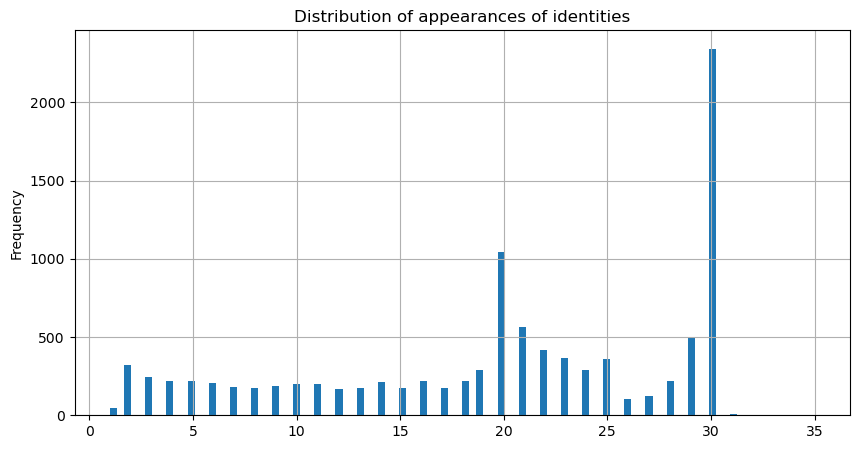

In [47]:
# plot the distribution of appearances of identities

identity_counts["count"].plot.hist(
    bins=100, 
    figsize=(10, 5), 
    title="Distribution of appearances of identities",
    xlabel="Number of appearances",
    ylabel="Number of identities",
    grid=True,
)

Identities are mostly represented 30 times in the dataset.

___
#### Attributes

In [50]:
attributes = pd.read_csv('data/Anno/list_attr_celeba.txt', sep=" ", header=1, index_col=0)
attributes.index.name = "image_id"
print("The shape of the attributes dataframe is: ", attributes.shape)
print("Number of attributes: {}".format(len(attributes.columns)))
display(attributes.head()) # first 5 (default) attributes

The shape of the attributes dataframe is:  (202599, 40)
Number of attributes: 40


,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
image_id,,,,,,,,,,,,,,,,,,,,,
000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


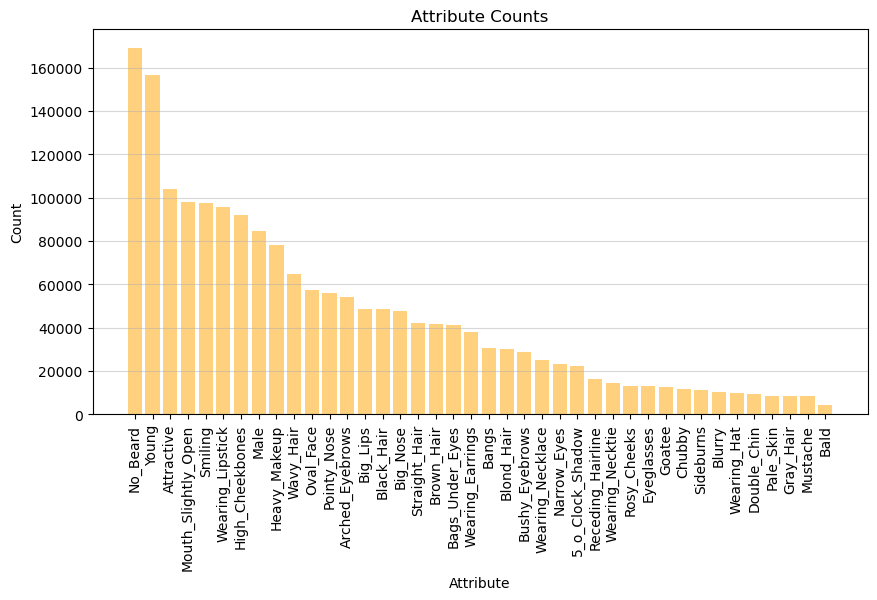

In [16]:
binary_attributes = attributes.replace(to_replace=-1, value=0) # replace -1 with 0
attribute_counts = binary_attributes.sum(axis=0).sort_values(ascending=False) # sum each column and sort


%matplotlib inline

plt.figure(figsize=(10, 5))
plt.bar(range(len(attribute_counts)), attribute_counts, color="orange", alpha=0.5)
plt.xlabel("Attribute")
plt.ylabel("Count")
# on the x axis, we need to label the bars with the attribute names
plt.xticks(range(len(attribute_counts)), attribute_counts.index, rotation=90)
plt.grid(True, axis="y", alpha=0.5)
plt.title("Attribute Counts")
plt.show()

___
#### Bounding Boxes

The bounding boxes are the coordinates of the face in the image. They are represented by 4 numbers: x, y, width and height.

In [48]:
bounding_boxes = pd.read_csv('data/Anno/list_bbox_celeba.txt', sep=" ", header=1, index_col=0)
bounding_boxes.index.name = "image_id"
print("The shape of the bounding boxes dataframe is: ", bounding_boxes.shape)
display(bounding_boxes.head()) # first 5 (default) bounding boxes

The shape of the bounding boxes dataframe is:  (202599, 4)


,x_1,y_1,width,height
image_id,,,,
000001.jpg,95,71,226,313
000002.jpg,72,94,221,306
000003.jpg,216,59,91,126
000004.jpg,622,257,564,781
000005.jpg,236,109,120,166


___
#### Landmarks

The landmarks are the coordinates of 5 points on the face: left eye, right eye, nose, left mouth and right mouth.

There are 2 data_files for the landmarks: `list_landmarks_align_celeba.txt` and `list_landmarks_celeba.txt`. The first one contains the landmarks for the aligned images and the second one for the non-aligned images.

In [58]:
landmarks_aligned = pd.read_csv('data/Anno/list_landmarks_align_celeba.txt', sep=" ", header=1, index_col=0)
landmarks_aligned.index.name = "image_id"
print("The shape of the landmarks_aligned dataframe is: ", landmarks_aligned.shape)
display(landmarks_aligned.head()) # first 5 (default) landmarks

The shape of the landmarks_aligned dataframe is:  (202599, 10)


,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y
image_id,,,,,,,,,,
000001.jpg,69,109,106,113,77,142,73,152,108,154
000002.jpg,69,110,107,112,81,135,70,151,108,153
000003.jpg,76,112,104,106,108,128,74,156,98,158
000004.jpg,72,113,108,108,101,138,71,155,101,151
000005.jpg,66,114,112,112,86,119,71,147,104,150


In [59]:
landmarks_wild = pd.read_csv('data/Anno/list_landmarks_celeba.txt', sep=" ", header=1, index_col=0)
landmarks_wild.index.name = "image_id"
print("The shape of the landmarks_wild dataframe is: ", landmarks_wild.shape)
display(landmarks_wild.head()) # first 5 (default) landmarks

The shape of the landmarks_wild dataframe is:  (202599, 10)


,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y
image_id,,,,,,,,,,
000001.jpg,165,184,244,176,196,249,194,271,266,260
000002.jpg,140,204,220,204,168,254,146,289,226,289
000003.jpg,244,104,264,105,263,121,235,134,251,140
000004.jpg,796,539,984,539,930,687,762,756,915,756
000005.jpg,273,169,328,161,298,172,283,208,323,207


## 4. Evaluation

## 5. Images